In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path='D://SimpliLearn Projects//Data-Science-Capstone-Projects//Project_2//'
df = pd.read_csv(path+'healthcare appointment data.csv')
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [3]:
df.shape

(300000, 15)

In [4]:
df['Status'].unique()

array(['Show-Up', 'No-Show'], dtype=object)

In [5]:
df.isnull().sum()

Age                        0
Gender                     0
AppointmentRegistration    0
ApointmentData             0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alcoolism                  0
HiperTension               0
Handcap                    0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
dtype: int64

In [6]:
df['Status'] = df['Status'].map({'Show-Up': 1, 'No-Show': 0})
df['Status'].unique()

array([1, 0], dtype=int64)

In [7]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df['Gender'].unique()

array([1, 0], dtype=int64)

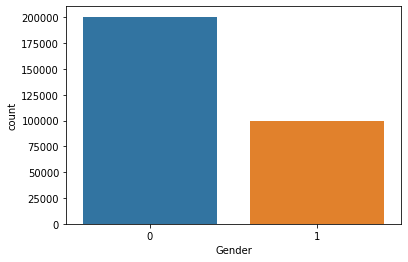

In [8]:
import seaborn as sns
sns.countplot(x='Gender', data=df)

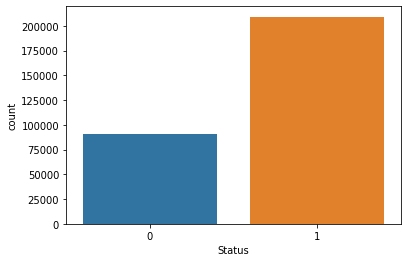

In [9]:
sns.countplot(x='Status', data=df)

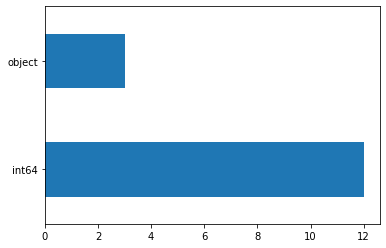

In [10]:
df.dtypes.value_counts().plot(kind='barh')

In [11]:
df.groupby(['Age'])['Gender'].count()

Age
-2          1
-1          5
 0      10326
 1       4535
 2       2726
        ...  
 102        4
 103        4
 104        2
 108        1
 113        3
Name: Gender, Length: 109, dtype: int64

In [12]:
df['year'] = pd.DatetimeIndex(df['ApointmentData']).year
df['month'] = pd.DatetimeIndex(df['ApointmentData']).month

In [13]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,year,month
0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,1,0,0,0,0,0,0,0,0,-29,2015,1
1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,1,0,0,0,0,0,0,0,0,-1,2015,8
2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,1,0,0,0,0,0,0,0,0,-1,2014,2
3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,1,0,0,0,0,0,0,0,1,-15,2014,8
4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,1,0,0,0,0,0,0,0,1,-6,2015,10


In [14]:
dfcount = pd.DataFrame(df.groupby(['year','month'])['Gender'].count())

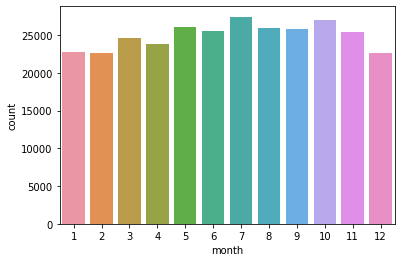

In [15]:
sns.countplot(x='month', data=df)

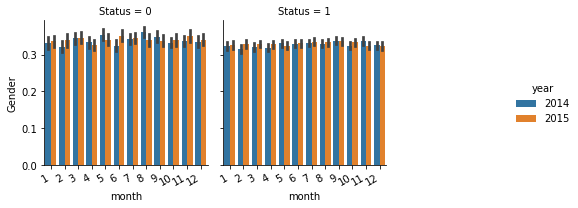

In [16]:
g = sns.catplot(x="month", y ='Gender', hue='year', col="Status", col_wrap=3,
                   data=df, kind="bar", height=3, aspect=.8)
g.set_xticklabels(rotation=30, ha="right")
plt.tight_layout()
plt.show()

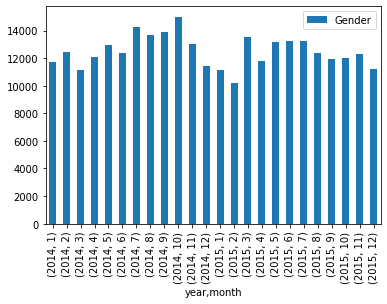

In [17]:
dfcount.plot(kind='bar')
plt.show()

In [18]:
columns = ['Diabetes','Alcoolism','HiperTension','Handcap','Smokes','Scholarship','Tuberculosis']

for column in columns:
    print(column)
    print(len(df[df[column] == 1]))    

Diabetes
23390
Alcoolism
7503
HiperTension
64767
Handcap
5098
Smokes
15711
Scholarship
29069
Tuberculosis
135


In [19]:
days = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':0}

df['day_of_week'] = df['DayOfTheWeek'].apply(lambda x: days[x])
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,year,month,day_of_week
0,19,1,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,1,0,0,0,0,0,0,0,0,-29,2015,1,3
1,24,0,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,1,0,0,0,0,0,0,0,0,-1,2015,8,3
2,4,0,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,1,0,0,0,0,0,0,0,0,-1,2014,2,2
3,5,1,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,1,0,0,0,0,0,0,0,1,-15,2014,8,4
4,38,1,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,1,0,0,0,0,0,0,0,1,-6,2015,10,2


In [20]:
df = df.drop(['AppointmentRegistration', 'ApointmentData', 'DayOfTheWeek'], axis=1)
df.shape

(300000, 15)

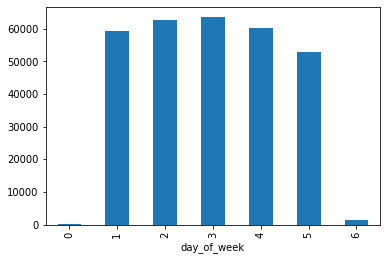

In [21]:
df.groupby(['day_of_week'])['Gender'].count().plot(kind='bar')
plt.show()

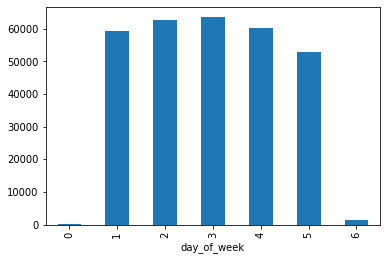

In [22]:
df.groupby(['day_of_week'])['Status'].count().plot(kind='bar')
plt.show()

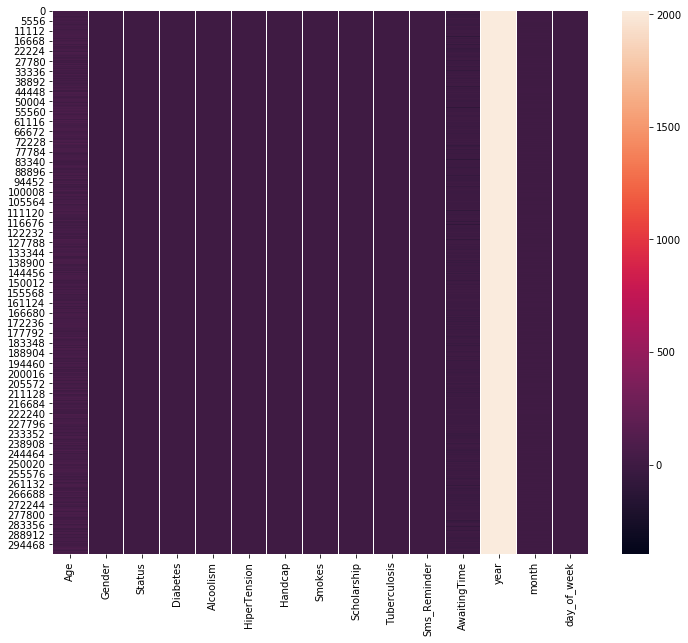

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(df)
plt.show()

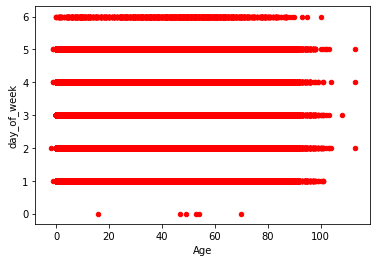

In [24]:
ax1 = df.plot(kind='scatter', x='Age', y='day_of_week', color='r')    
#ax2 = df.plot(kind='scatter', x='Age', y='Status', color='g', ax=ax1)    
#ax3 = df.plot(kind='scatter', x='Gender', y='Status', color='b', ax=ax1)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(['Status'], axis=1)
y = df['Status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(225000, 14)
(75000, 14)
(225000,)
(75000,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [27]:
seed = 7
# prepare models
models = []
#models.append(('LReg', LinearRegression()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)    
    results.append(accuracy_score(ypred, y_test))
    names.append(name)

LR
LDA
KNN
CART
NB


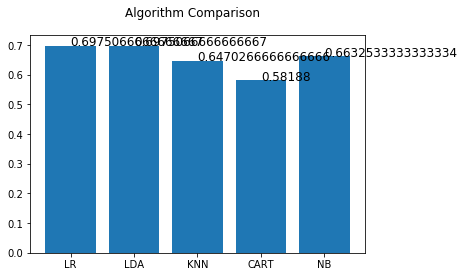

In [29]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(names, results)
#ax.set_yticklabels(results)
#add_value_labels(ax)
for i in range(len(results)):
    plt.text(x = names[i], y = results[i],s = results[i],size = 12)
plt.show()